#Setting up device agnostic code

In [2]:
import torch
from torch import nn

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Getting Data

In [5]:
import requests
import zipfile
from pathlib import Path

#Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(image_path,"exists")
else:
    print(image_path,"does not exist, creating one")
    image_path.mkdir(parents=True, exist_ok=True)


#Download data
with open(data_path / "pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading data..")
    f.write(request.content)

#Unzip data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one
Unzipping pizza, steak and sushi data...


# Data Exploration

In [6]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


## Temp

In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza


In [8]:
for dirpath, dirnames, filenames in os.walk(image_path):
    print(dirpath)

data/pizza_steak_sushi
data/pizza_steak_sushi/test
data/pizza_steak_sushi/test/steak
data/pizza_steak_sushi/test/sushi
data/pizza_steak_sushi/test/pizza
data/pizza_steak_sushi/train
data/pizza_steak_sushi/train/steak
data/pizza_steak_sushi/train/sushi
data/pizza_steak_sushi/train/pizza


In [9]:
walked = os.walk(image_path)

In [10]:
next(walked)

('data/pizza_steak_sushi', ['test', 'train'], [])

In [11]:
for dirpath, dirnames, filenames in os.walk(image_path):
    print(filenames)

[]
[]
['1285886.jpg', '3873283.jpg', '1868005.jpg', '296375.jpg', '966174.jpg', '1627703.jpg', '1016217.jpg', '3424937.jpg', '27415.jpg', '2117351.jpg', '502076.jpg', '2144308.jpg', '1302563.jpg', '673127.jpg', '894825.jpg', '690177.jpg', '354513.jpg', '1882831.jpg', '100274.jpg']
['479711.jpg', '1987407.jpg', '46797.jpg', '2521706.jpg', '684266.jpg', '719108.jpg', '3177743.jpg', '2715127.jpg', '1600999.jpg', '343036.jpg', '207578.jpg', '1680893.jpg', '1434806.jpg', '887831.jpg', '1230335.jpg', '1172255.jpg', '858157.jpg', '1245193.jpg', '2276986.jpg', '3196729.jpg', '3837522.jpg', '2540511.jpg', '2190404.jpg', '1742201.jpg', '988559.jpg', '2394442.jpg', '2741434.jpg', '175783.jpg', '3806282.jpg', '2385731.jpg', '499605.jpg']
['2019408.jpg', '2218680.jpg', '416067.jpg', '1503858.jpg', '930553.jpg', '2236338.jpg', '344397.jpg', '971934.jpg', '714866.jpg', '648055.jpg', '2508636.jpg', '1687143.jpg', '3092704.jpg', '1925494.jpg', '398345.jpg', '3475871.jpg', '2124579.jpg', '195160.jpg', '

## Setup

In [12]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Visualizing the images

In [13]:
image_path

PosixPath('data/pizza_steak_sushi')

data/pizza_steak_sushi/test/sushi/2276986.jpg
sushi
Random Image Path: data/pizza_steak_sushi/test/sushi/2276986.jpg
Image Class: sushi
Image height: 512
Image Width: 512


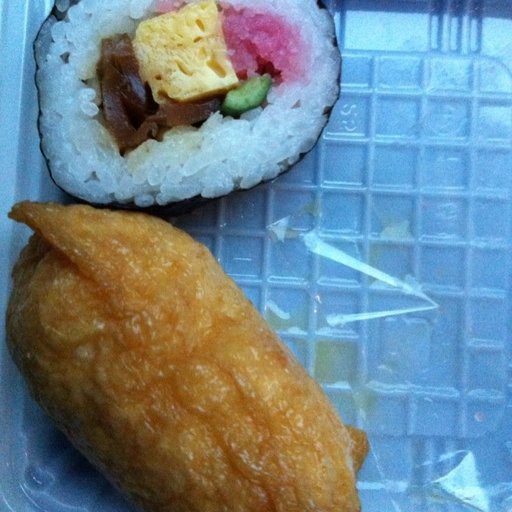

In [14]:
import random
from PIL import Image

# random.seed(42)

#Get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

#pick a random image path
random_image_path = random.choice(image_path_list)

print(random_image_path)

#Get the image clss from path name (directory)
image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)

#Metadata
print(f"Random Image Path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image Width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

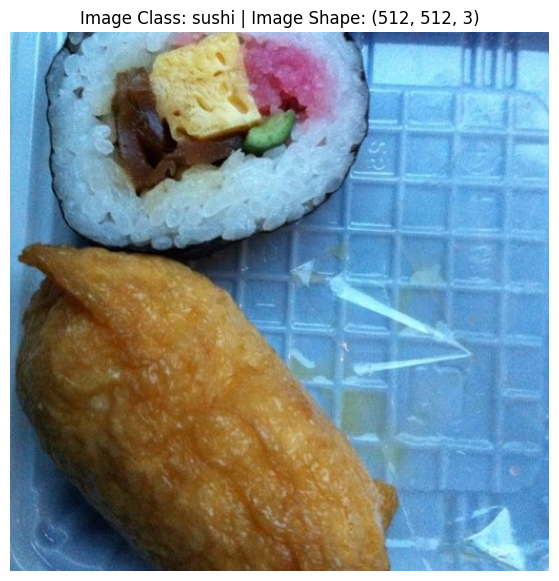

In [15]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image Class: {image_class} | Image Shape: {img_as_array.shape}")
plt.axis(False)

## Transforming Data

In [16]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [17]:
# #Write a transform for image
# data_transform = nn.Sequential(

# )

#Write a transform for image
data_transform = transforms.Compose([
    #Resize our image to 64x64
    transforms.Resize(size=(64,64)),
    #Flip the image
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image to tensor
    transforms.ToTensor()
])

In [18]:
data_transform(img).shape

torch.Size([3, 64, 64])

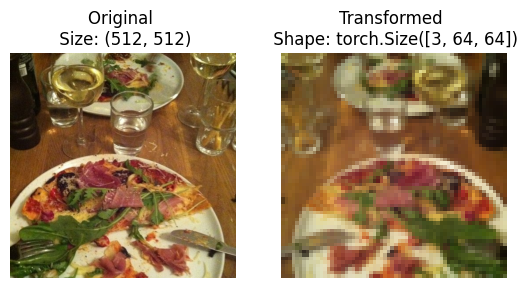

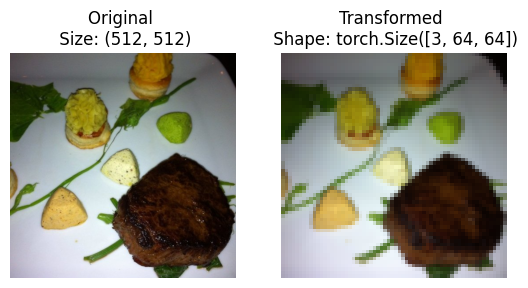

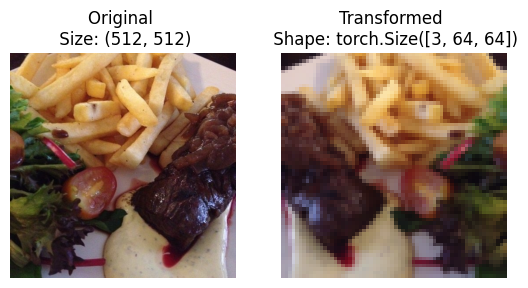

In [19]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """
    Selects random images from a path of images. Loads and Transforms them.
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \n Size: {f.size}")
            ax[0].axis(False)

            #Transform and plot target image
            transformed_image = transform(f)

            ax[1].imshow(transformed_image.permute(1,2,0))
            ax[1].set_title(f"Transformed \n Shape: {transformed_image.shape}")
            ax[1].axis("off")

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform)


# Loading Image Data

## Method 1 -> Using datasets.ImageFolder

In [20]:
# Image Folder

from torchvision import datasets
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)

In [21]:
test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform
)

In [22]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [23]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [24]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [25]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [26]:
len(train_data), len(test_data)

(225, 75)

In [27]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [28]:
img, label = train_data[0][0], train_data[0][1]


## Turning loaded image to DataLoader

In [29]:
import os
os.cpu_count()

2

In [30]:
# Turn train and test datasets into Dataloader

from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size = BATCH_SIZE,
    num_workers = os.cpu_count(),
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    num_workers=1,
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8d81ca33d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8d81dbbf50>)

In [31]:
len(train_dataloader)

8

In [32]:
len(test_dataloader)

3

In [33]:
img, label = next(iter(train_dataloader))

print(f"Image Shape: {img.shape}")
print(f"Label Shape: {label.shape}")


Image Shape: torch.Size([32, 3, 64, 64])
Label Shape: torch.Size([32])


## Method 2 -> Using Raw Datasets class

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset


Pros:
* Create a '`Dataset` out of almost anything
* Not limited to pytorch prebuilt functions

Cons:
* Does not mean all the time it will work, requires more code

All custom datasets in pytorch are subclassed with Dataset

In [34]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

Creating a helper function to get class names

we want function to
1. get class names using `os.scandir()` to traverse a target directory
2. Raise an error if the class names are not found
3. Turn class names into list and dict

In [36]:
#Setup path for target directory
target_directory = Path('data/pizza_steak_sushi/train')

In [37]:
target_directory

PosixPath('data/pizza_steak_sushi/train')

In [38]:
#Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

['pizza', 'steak', 'sushi']

In [42]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
    """
    Finds the class folder names in a target directory.
    """
    #Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    if not classes:
        raise FileNotFoundError(f"Coundn't find any classes in directory {directory}")

    #Create a dictionary of index labels
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

    return classes, class_to_idx
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [43]:
# Create a custom 'Dataset'

To Create our own custom dataset, we want to:
1. Subclass 'torch.utils.data.Dataset'
2. Init our subclass with a target directory
3. Create several attributes:
    * paths - paths of our images
    * transform
    * classes
    * class_to_idx
4. Create the function to `load_images()`, this function will open an image
5. over the `__len()__` method to return the length of our dataset
6. Overwirte the `__getitem()__` method to return a given sample when passed an index


In [81]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    def __init__(self, tar_dir:str,transform=None):
        # super.__init__()
        self.paths = list(pathlib.Path(tar_dir).glob("*/*.jpg"))
        #Setup transforms
        self.transform = transform
        #Create classes and class to idx
        self.classes, self.class_to_idx = find_classes(tar_dir)

    def load_image(self, index:int) -> Image.Image:
        "Opens an Image via a path and returns it"
        image_path = self.paths[index]
        return Image.open(image_path)

    #Overwrite __len__()
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    #Overwrite __getitem__()
    def __getitem__(self,index:int) -> Tuple[torch.Tensor,int]:
        "Returns one sample of data, data and label (X,y)"
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        #Transform if necessary
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx


In [82]:
#Create a transform
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [84]:
train_data_custom = ImageFolderCustom(tar_dir=train_dir,
                                      transform=train_transforms)

In [85]:
test_data_custom = ImageFolderCustom(tar_dir = test_dir,
                                     transform=test_transforms)

In [86]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f8d6cb48e90>,
 <__main__.ImageFolderCustom at 0x7f8d6cc55490>)

In [87]:
len(train_data), len(train_data_custom)

(225, 225)

In [88]:
len(test_data), len(test_data_custom)

(75, 75)

In [89]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [90]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

## Custom loaded image to DataLoader

In [91]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader_custom = DataLoader(
    dataset=train_data_custom,
    batch_size = BATCH_SIZE,
    num_workers=0,
    shuffle=True
)

test_dataloader_custom = DataLoader(
    dataset=test_data_custom,
    batch_size=BATCH_SIZE,
    num_workers = 0,
    shuffle=False
)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f8d6cad4650>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8d6cad5910>)

In [92]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))